<a href="https://colab.research.google.com/github/Mohamedtamerr/Mohamed/blob/main/Copy_of_Regression_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Malak Moataz

ID: 49-4075

Tutorial:3

---

Name: Mohamed Tamer

ID:49-0675

Tutorial: 3

---

Name:

ID:

Tutorial:

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/car_prices.csv')

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [2]:
df.describe(include='object')
#data inspection purposes


,make,model,trim,body,transmission,vin,state,odometer,color,interior,seller,mmr,sellingprice,saledate
count,46578,46578,46578,46578,46578,46578,46578,46578,46578,46578,46578,46578,46578,46578
unique,48,648,1097,71,2,46578,34,39460,20,17,4686,1021,953,2286
top,Ford,Altima,Base,Sedan,automatic,5npeb4acxdh702805,fl,1.0mi,black,black,"ford motor credit company,llc",$11300,$12000,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,7871,1610,4851,17171,44928,1,7451,86,9156,20734,1733,168,397,490


## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [3]:
df['mmr']=df['mmr'].str.extract('([0-9]+)',expand=False).str.strip()
df['mmr']=df['mmr'].astype('int')
df
#remove $ sign in mmr column

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0mi,—,gray,wheels exchange llc,15650,$17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0mi,black,black,nissan infiniti lt,19350,$21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0mi,white,beige,motorcars of south texas,22200,$22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0mi,black,beige,avis rac/san leandro,13400,$13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


In [4]:
df['sellingprice']=df['sellingprice'].str.extract('([0-9]+)',expand=False).str.strip()
df['sellingprice']=df['sellingprice'].astype('int')
df
#remove $ sign from sellingprice col

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,28700,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0mi,—,gray,wheels exchange llc,15650,17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0mi,black,black,nissan infiniti lt,19350,21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0mi,white,beige,motorcars of south texas,22200,22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0mi,black,beige,avis rac/san leandro,13400,13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


In [5]:

df['odometer']=df['odometer'].str.extract('([0-9]+)',expand=False).str.strip()
df['odometer']=df['odometer'].astype('int')
df
#make the column only int

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404,black,gray,the hertz corporation,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846,gray,—,award auto sales and leasing inc,28700,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122,silver,black,lexus financial services,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303,black,black,peddle llc,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714,white,gray,u-haul,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844,—,gray,wheels exchange llc,15650,17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185,black,black,nissan infiniti lt,19350,21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357,white,beige,motorcars of south texas,22200,22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376,black,beige,avis rac/san leandro,13400,13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


In [6]:
df['year'] = df['saledate'].str.split(' ').str[3]

df
# new column to represent only the year for simplification

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404,black,gray,the hertz corporation,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2015,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846,gray,—,award auto sales and leasing inc,28700,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2015,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122,silver,black,lexus financial services,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2015,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303,black,black,peddle llc,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2015,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714,white,gray,u-haul,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2015,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844,—,gray,wheels exchange llc,15650,17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2015,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185,black,black,nissan infiniti lt,19350,21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2015,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357,white,beige,motorcars of south texas,22200,22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2015,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376,black,beige,avis rac/san leandro,13400,13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


In [7]:
df['saleyear'] = df['saledate'].str.split(' ').str[3]
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,saleyear
0,2015,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404,black,gray,the hertz corporation,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT),2015
1,2015,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846,gray,—,award auto sales and leasing inc,28700,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST),2015
2,2015,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122,silver,black,lexus financial services,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST),2015
3,2015,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303,black,black,peddle llc,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST),2015
4,2015,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714,white,gray,u-haul,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST),2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2015,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844,—,gray,wheels exchange llc,15650,17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST),2015
46574,2015,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185,black,black,nissan infiniti lt,19350,21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT),2015
46575,2015,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357,white,beige,motorcars of south texas,22200,22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST),2015
46576,2015,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376,black,beige,avis rac/san leandro,13400,13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST),2015


In [8]:
idx = df.index[df['interior'] == '—'].tolist()
df.drop(idx,inplace=True)

idx = df.index[df['color'] == '—'].tolist()
df.drop(idx,inplace=True)

#drop records that has missing values

In [11]:
df.drop(['vin'],axis=1,inplace=True)
df
#drop vin column because we will not use them in the model

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,saleyear
0,2015,Hyundai,Sonata,GLS,sedan,automatic,ma,3.9,50404,black,gray,the hertz corporation,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT),2015
2,2015,Lexus,IS 250,Base,Sedan,automatic,fl,4.1,21122,silver,black,lexus financial services,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST),2015
3,2015,BMW,X5,4.4i,SUV,automatic,fl,1.9,145303,black,black,peddle llc,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST),2015
4,2015,Ford,E-Series Van,E-250,E-Series Van,automatic,wa,4.9,6714,white,gray,u-haul,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST),2015
5,2015,Kia,Optima,LX,sedan,automatic,co,4.6,8386,black,gray,"kia motors america, inc",15100,15500,Tue Jun 16 2015 05:00:00 GMT-0700 (PDT),2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46572,2015,Volvo,S40,2.4i,Sedan,automatic,ca,3.8,56993,gray,gray,prestige auto wholesale inc,6350,7000,Tue May 26 2015 05:30:00 GMT-0700 (PDT),2015
46574,2015,Infiniti,G Sedan,G37 Journey,g sedan,automatic,ca,4.5,23185,black,black,nissan infiniti lt,19350,21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT),2015
46575,2015,BMW,3 Series,328i,Sedan,automatic,tx,4.2,45357,white,beige,motorcars of south texas,22200,22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST),2015
46576,2015,Toyota,Camry,LE,Sedan,automatic,ca,3.5,43376,black,beige,avis rac/san leandro,13400,13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST),2015


In [12]:
df.loc[df['body'].str.contains("suv",case=True),'body']='SUV'
df.loc[df['body'].str.contains("Suv",case=True),'body']='SUV'
df.loc[df['body'].str.contains("sedan",case=True),'body']='Sedan'
df.loc[df['body'].str.contains("Sedan",case=True),'body']='Sedan'
df.loc[df['body'].str.contains("cab",case=True),'body']='Pickup Truck'
df.loc[df['body'].str.contains("Cab",case=True),'body']='Pickup Truck'
df.loc[df['body'].str.contains("tab",case=True),'body']='Pickup Truck'
df.loc[df['body'].str.contains("koup",case=True),'body']='Coupe'
df.loc[df['body'].str.contains("Coupe",case=True),'body']='Coupe'
df.loc[df['body'].str.contains("coupe",case=True),'body']='Coupe'
df.loc[df['body'].str.contains("Koup",case=True),'body']='Coupe'
df.loc[df['body'].str.contains("convertible",case=True),'body']='Convertible'
df.loc[df['body'].str.contains("Convertible",case=True),'body']='Convertible'
df.loc[df['body'].str.contains("hatchback",case=True),'body']='Hatchback'
df.loc[df['body'].str.contains("minivan",case=True),'body']='Minivan'
df.loc[df['body'].str.contains("wagon",case=True),'body']='Wagon'
df.loc[df['body'].str.contains("Wagon",case=True),'body']='Wagon'
df.loc[df['body'].str.contains("E-Series Van",case=True),'body']='Van'
df.loc[df['body'].str.contains("e-series Van",case=True),'body']='Minivan'
df.loc[df['body'].str.contains("van",case=True),'body']='Minivan'
df.loc[df['body'].str.contains("Van",case=True),'body']='Minivan'
df.loc[df['body'].str.contains("supercrew",case=True),'body']='Pickup Truck'
df.loc[df['body'].str.contains("Supercrew",case=True),'body']='Pickup Truck'
df.loc[df['body'].str.contains("SuperCrew",case=True),'body']='Pickup Truck'
#Reducing the Body column into  Sedan, Coupe, Convertible, Hatchback, SUV,Minivan Wagon, Pickup Truck.

In [13]:
df['body'].value_counts()

Sedan           20111
SUV             11088
Pickup Truck     3737
Minivan          2520
Hatchback        2035
Coupe            1637
Wagon            1344
Convertible       872
Name: body, dtype: int64

## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


In [ ]:
black followed by white

**Visualization**

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,saleyear
0,2015,Hyundai,Sonata,GLS,Sedan,automatic,ma,3.9,50404,black,gray,the hertz corporation,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT),2015
2,2015,Lexus,IS 250,Base,Sedan,automatic,fl,4.1,21122,silver,black,lexus financial services,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST),2015
3,2015,BMW,X5,4.4i,SUV,automatic,fl,1.9,145303,black,black,peddle llc,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST),2015
4,2015,Ford,E-Series Van,E-250,Minivan,automatic,wa,4.9,6714,white,gray,u-haul,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST),2015
5,2015,Kia,Optima,LX,Sedan,automatic,co,4.6,8386,black,gray,"kia motors america, inc",15100,15500,Tue Jun 16 2015 05:00:00 GMT-0700 (PDT),2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46572,2015,Volvo,S40,2.4i,Sedan,automatic,ca,3.8,56993,gray,gray,prestige auto wholesale inc,6350,7000,Tue May 26 2015 05:30:00 GMT-0700 (PDT),2015
46574,2015,Infiniti,G Sedan,G37 Journey,Sedan,automatic,ca,4.5,23185,black,black,nissan infiniti lt,19350,21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT),2015
46575,2015,BMW,3 Series,328i,Sedan,automatic,tx,4.2,45357,white,beige,motorcars of south texas,22200,22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST),2015
46576,2015,Toyota,Camry,LE,Sedan,automatic,ca,3.5,43376,black,beige,avis rac/san leandro,13400,13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST),2015


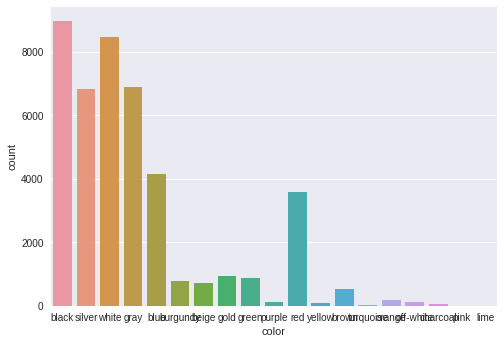

In [15]:
sns.countplot(x='color', data=df)

df
#basic visualization for data

Text(0.5, 1.0, 'relation')

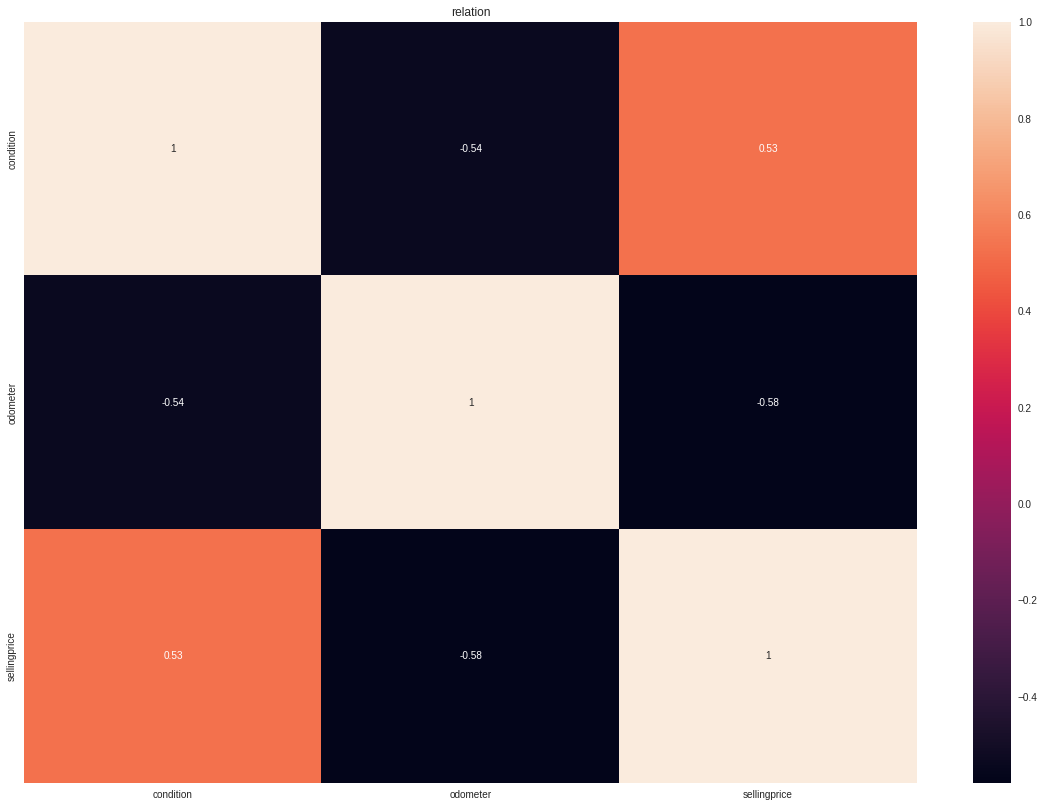

In [40]:
plt.figure(figsize = (20, 14))
sns.heatmap(df.corr(), annot = True)
plt.title("relation")

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


Ford then Chevrolet then Nissan

**Visualization**

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

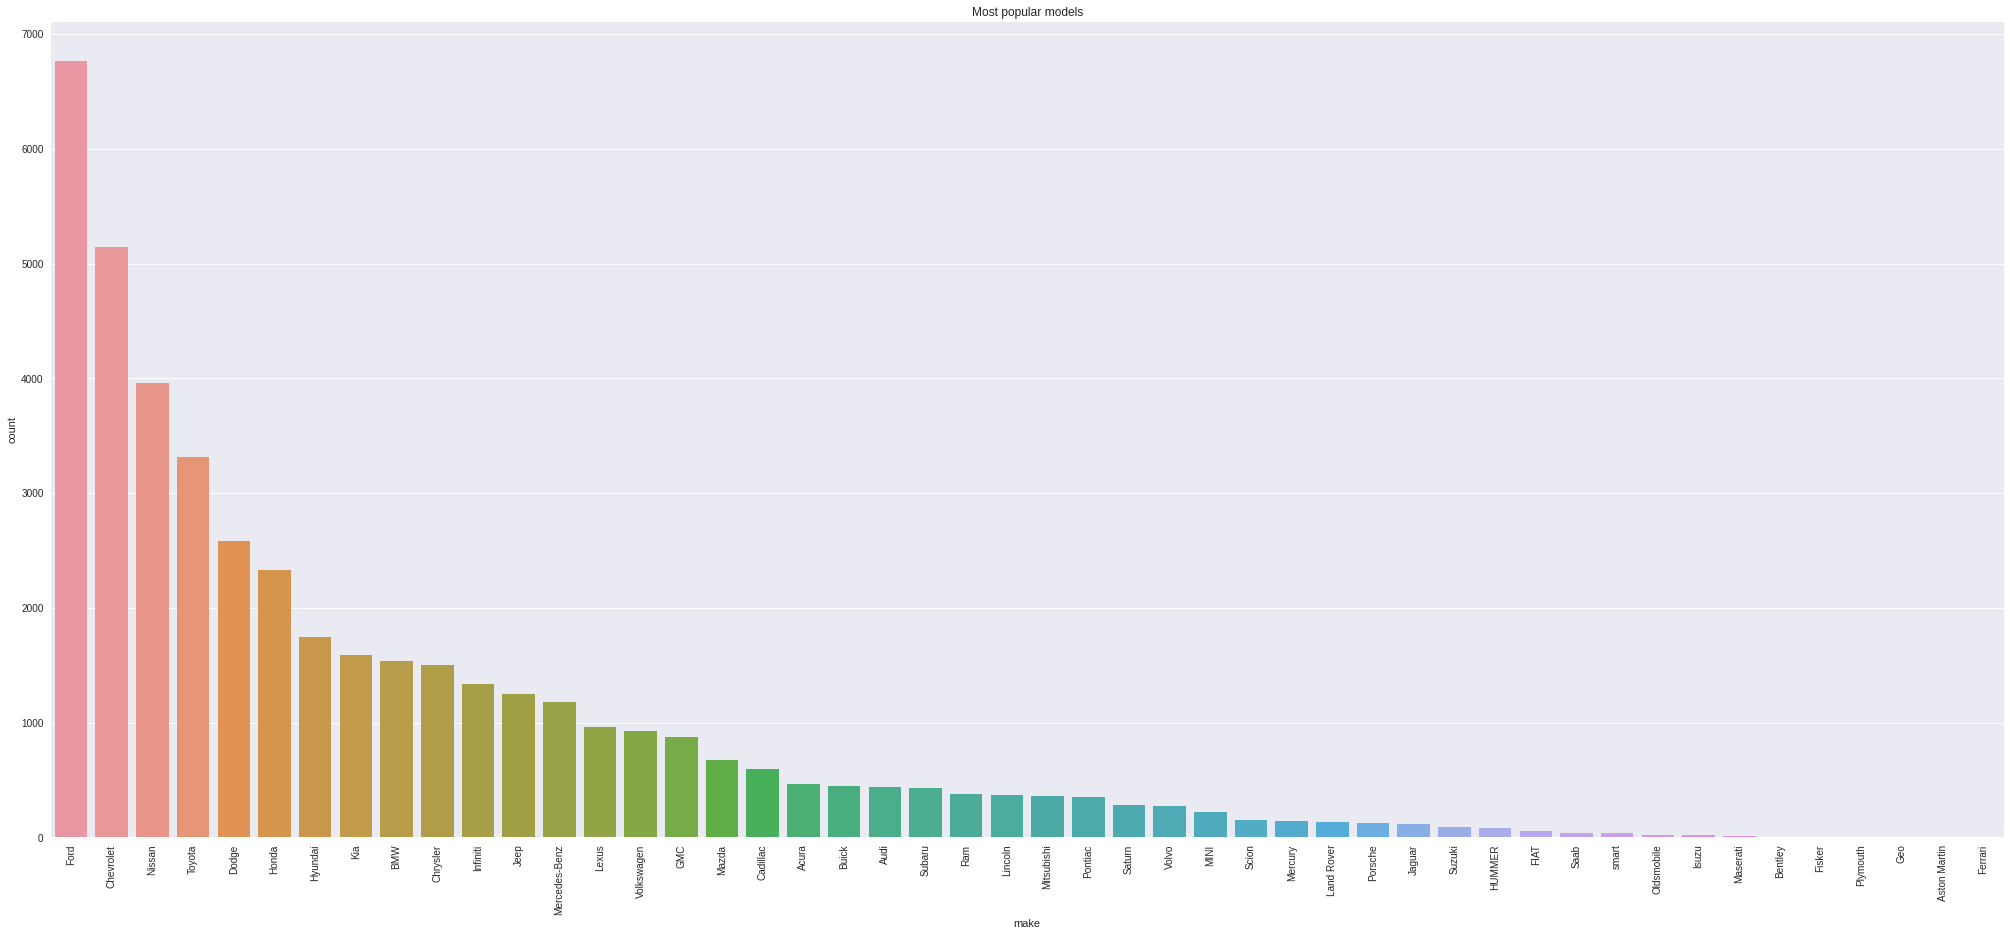

In [18]:
plt.figure(figsize=(35,15))
large_to_small=df.groupby('make').size().sort_values(ascending=False)
sns.countplot(x='make',data=df,order=large_to_small.index).set(title='Most popular models')
plt.xticks(rotation=90)
plt.tight_layout
#visual representation of the most popular brands

**Answer for Q1**: Your answer here

**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


Yes around 1000 difference in selling price

Text(0.5, 1.0, 'Manual vs Automatic Selling Price')

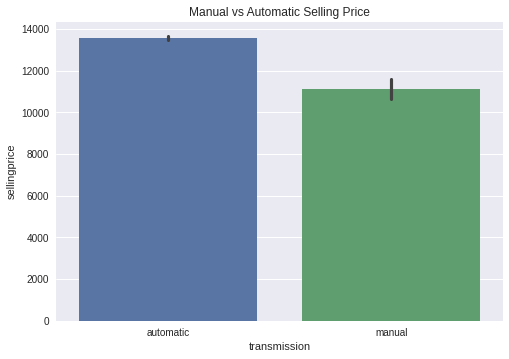

In [35]:
ax=sns.barplot(data=df, x='transmission', y='sellingprice')
ax.set_title("Manual vs Automatic Selling Price")
#representing automatic transmission with regards to manual 

**Visualization**

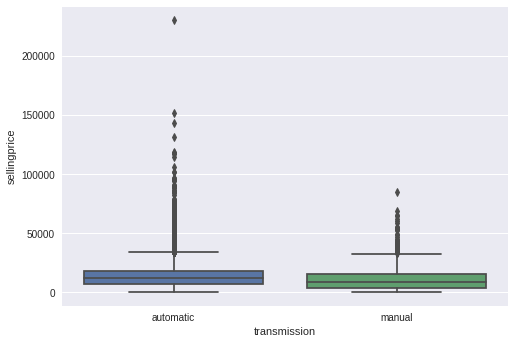

In [21]:
sns.boxplot(x='transmission', y='sellingprice', data=df);
#visualizing using boxplot of transmisson and sellingprice

**Answer for Q2**: Your answer here

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


Widest distribution of selling price are Porsche then Jaguar. 
Most expesive are Porsche and Bentley

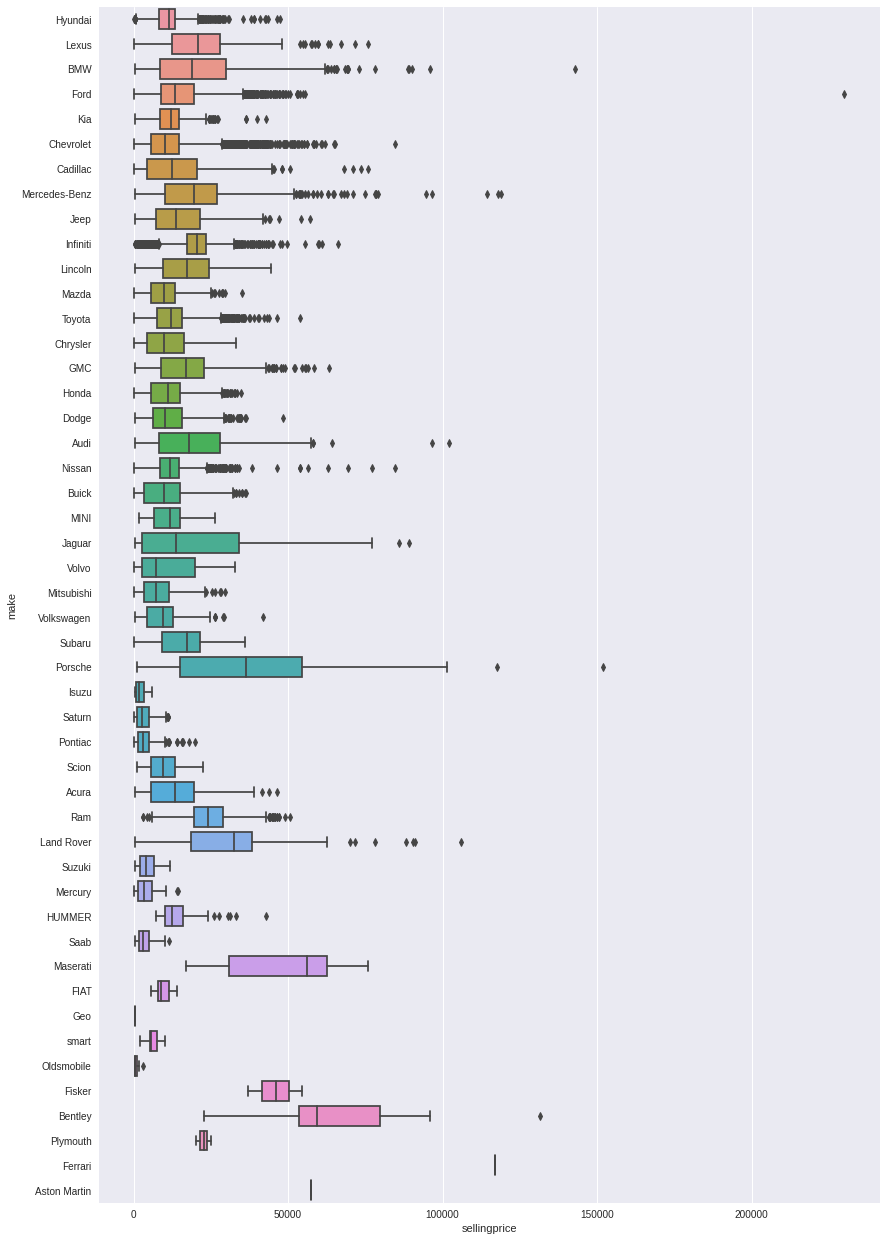

In [28]:
f = plt.figure(figsize=(14,22))
sns.boxplot(x="sellingprice", y="make",data=df)
#boxplot visualizing for car makes against selling prices

ENCODING



**Visualization**

**Answer for Q3**: Your answer here

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

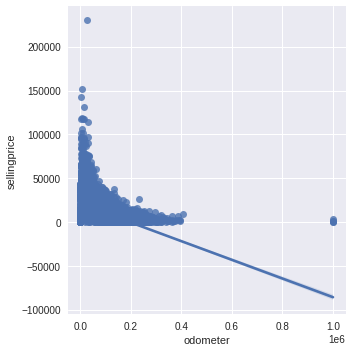

In [29]:
sns.lmplot(x='odometer',y='sellingprice',data=df,palette='deep')
#linear regression model to visualize relation among odometer and sellingprice

**Answer for Q4**: Your answer here

Negative corelation

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

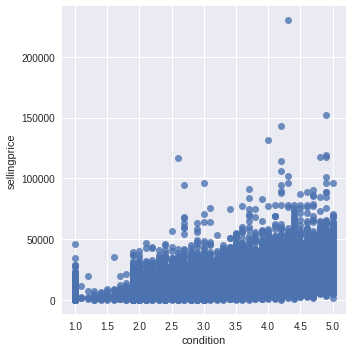

In [30]:
sns.lmplot(x='condition',y='sellingprice',data=df,palette='deep')
#linear regression model to visualize relation among cars condition and sellingprice

**Visualization**

**Answer for Q5**: Your answer here

Positive corelation

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

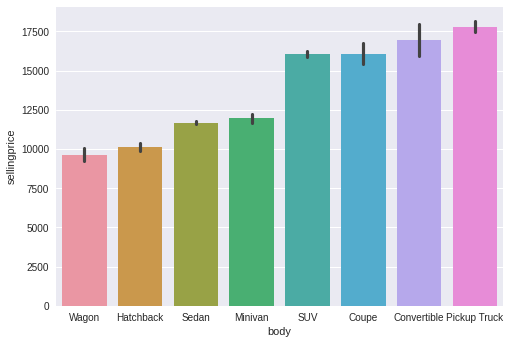

In [31]:
order=df.groupby(["body"])['sellingprice'].mean().sort_values().index
df['sellingprice'].sort_values(ascending=False,key=lambda x:x.abs())
sns.barplot(x='body',y="sellingprice",data=df,order=order)
plt.show()
#Plotting a bar plot in ascending order using mean of car price due to body type.

**Answer for Q6**: Your answer here

there is differences.Most expensive is pickup truck and least is wagon


## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [22]:
df = df.drop('saledate', axis=1)
df = df.drop('year', axis=1)
df = df.drop('seller', axis=1)
df = df.drop('state',axis=1)
df = df.drop('mmr',axis=1)
#droping columns that has high corelation 

In [24]:
df =df.drop('saleyear',axis=1)
#droping this column as it is not needed

In [26]:
categorical_columns = ['transmission', 'body','color','make','interior','model','trim']

df_encode = pd.get_dummies(data=df, columns=categorical_columns,dtype='int8')
df_encode.head()
#one-hot encoding to transform categorical columns to numeric

,condition,odometer,sellingprice,transmission_automatic,transmission_manual,body_Convertible,body_Coupe,body_Hatchback,body_Minivan,body_Pickup Truck,...,trim_sDrive35is,trim_t Turbo,trim_x,trim_xDrive28i,trim_xDrive30i,trim_xDrive35d,trim_xDrive35i,trim_xDrive35i Premium,trim_xDrive48i,trim_xDrive50i
0,3.9,50404,10900,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.1,21122,24200,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.9,145303,3200,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.9,6714,22100,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,4.6,8386,15500,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Modelling

_Apply the linear regression model below._

In [36]:
from sklearn.model_selection import train_test_split

x = df_encode.drop('sellingprice',axis=1) # Independent variable
y = df_encode['sellingprice'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)
print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 34675
Testing dataset size: 8669


In [37]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train);



## Model Evaluation

_Evaluate the model you applied._

In [38]:
# sklearn regression module
y_pred = lin_reg.predict(x_test)

# Evaluation
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, y_test, squared=False)

# R_square
R_square = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)
#, it is a statistical measure of how close the true values are to the fitted regression line. A score of 0 indicates that the model explains none of the variability of the response data around its mean. A score of 1.0 (best possible score) indicates that the model explains all of the variability of the response data around its mean. Root Mean Square Error (RMSE) allows us to compare the average deviation in the same units as the response variable.

The root mean square error (RMSE) is:  4507.546317893263
R^2 obtained is: 0.7839163938723344


## Model Validation (Optional)

_Check if the model you applied meets the necessary assumptions for the chosen model._

## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: 